In [1]:
import os
import numpy as np
import torch
from torch import nn
import math
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

In [5]:
torch.manual_seed(111)

In [3]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:

    device = torch.device("cpu")

In [60]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.FashionMNIST(
    root=".", train=True, download=True, transform=transform)

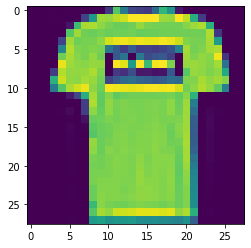

In [72]:
img = train_set[1][0].numpy().reshape(28, 28)
plt.imshow(img)

In [70]:
import cv2
cv2.imwrite('img_true.jpeg', img.reshape(28, 28))

True

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),     # 28X28 =  784
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

In [15]:
tensor = torch.load('/content/Comp_Vision_Task_6_Test_file_7.pt')
generator = torch.load("/content/generator_20")
generated_sample = generator(tensor).cpu().detach().numpy().reshape(28, 28)

In [24]:
def transform_array(array, old_min, old_max, new_min, new_max):
  scaled_array = (array - old_min) / (old_max - old_min)
  transformed_array = scaled_array * (new_max - new_min) + new_min
  return transformed_array

In [40]:
old_min, old_max = -1, 1
old_min, old_max = generated_sample.min(), generated_sample.max()
new_min, new_max = 0, 255

In [41]:
transfomed_array = transform_array(generated_sample, old_min, 
                                   old_max, new_min, new_max).round().astype(int)

In [58]:
import cv2
cv2.imwrite('img.jpeg', transfomed_array)

True

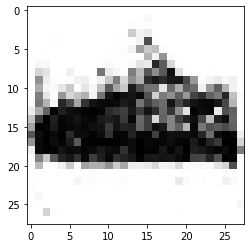

In [52]:
plt.imshow(np.abs(transfomed_array - 255), cmap='gray_r')

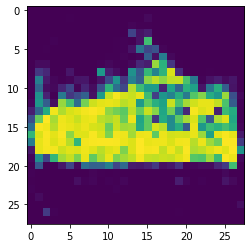

In [73]:
plt.imshow(transfomed_array)

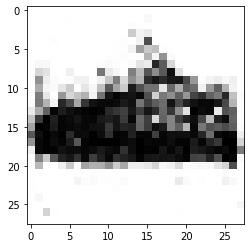

In [54]:
plt.imshow(transfomed_array, cmap='gray_r')

In [43]:
transfomed_array.mean()

72.2563775510204

In [ ]:
# right answer is 182.74362